# Lateral inhibition

We create a striatal network, then place two spherical symmetric population units with radie ```r``` containing ```N_pop``` neurons each at a distance ```d``` from each other.

We stimulate the two populations first A, then B, then A and B together and investigate the firing frequency of the two populations.

In [1]:
import os
import numpy as np
network_path = "first_lateral"
snudda_data = "../../../../BasalGangliaData/data"

modified_network_file=os.path.join(network_path, "network-synapses-minimal.hdf5")
duration=5

In [2]:
from snudda import SnuddaInit

n_DSPN = 2000
n_ISPN = 2000
n_FS = 0
n_LTS = 0
n_ChIN = 0

si = SnuddaInit(network_path=network_path, snudda_data=snudda_data, random_seed=12345, honor_stay_inside=False)
si.define_striatum(num_dSPN=n_DSPN, num_iSPN=n_ISPN, num_FS=n_FS, num_LTS=n_LTS, num_ChIN=n_ChIN,
                   volume_type="cube")

# The centre of the cube is [0.00475, 0.004, 0.00775]. num_neurons is optional
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([0,50e-6,150e-6]),
                               probability_function="(d < 200e-6)*1", num_neurons=20)
si.add_population_unit_density(structure_name="Striatum", neuron_types=["dSPN", "iSPN"], 
                               unit_centre=np.array([0.00475, 0.004, 0.00775]) -np.array([150e-6,0,0]),
                               probability_function="(d < 200e-6) * 1", num_neurons=20)
 
si.write_json()

Using cube for striatum
Neurons for striatum read from /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum
Adding neurons: dSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/dspn
Adding neurons: iSPN from dir /home/hjorth/HBP/BasalGangliaData/data/neurons/striatum/ispn
No directory $SNUDDA_DATA/neurons/striatum/ngf, skipping NGF cells.
Writing first_lateral/network-config.json


In [3]:
from snudda import Snudda
sn = Snudda(network_path=network_path)
sn.place_neurons()

Placing neurons
Network path: first_lateral
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Generating 15184 points for first_lateral/mesh/Striatum-cube-mesh-0.0003676388257808005.obj
n_points = 14455, previous close_pairs = 24930
n_points = 13765, previous close_pairs = 20312
n_points = 13114, previous close_pairs = 16764
n_points = 12501, previous close_pairs = 13866
n_points = 11927, previous close_pairs = 11590
n_points = 11391, previous close_pairs = 9640
n_points = 10893, previous close_pairs = 8133
n_points = 10436, previous close_pairs = 6743
n_points = 10019, previous close_pairs = 5618
n_points = 9640, previous close_pairs = 4821
n_points = 9299, previous close_pairs = 4102
n_points = 8994, previous close_pairs = 3458
n_points = 8725, previous close_pairs = 2886
n_points = 8623, previous close_pairs = 2392
n_points = 6429, previous close_pairs = 2194
Filtering 6429 points..
Filtering, keeping inside points: 4957 / 6429
stop_paralle

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 0 has 3960 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


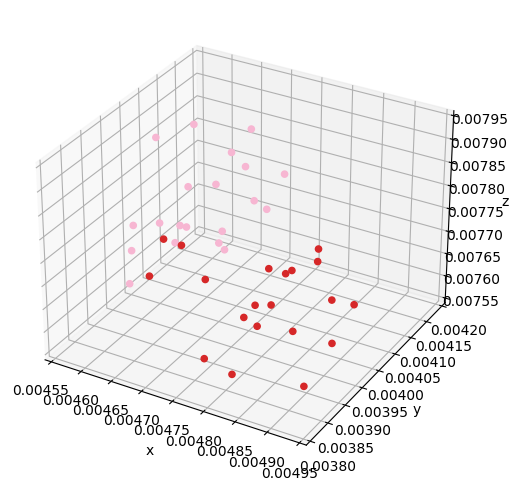

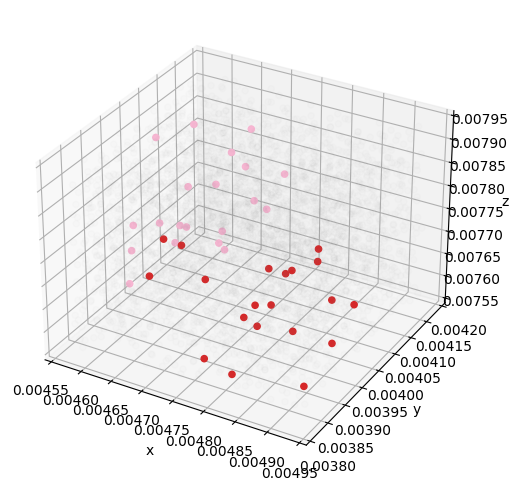

In [4]:
from snudda.plotting import PlotNetwork
pos_file = os.path.join(network_path, "network-neuron-positions.hdf5")

pn = PlotNetwork(pos_file)
pn.plot_populations(unmarked_alpha=0)
pn.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [5]:
os.system("../start_ipcluster.sh")

Sleeping 20 seconds to wait for workers to start


2024-02-12 18:32:35.152 [IPClusterStart] Starting ipcluster with [daemonize=False]
2024-02-12 18:32:35.408 [IPController] Hub listening on tcp://127.0.0.1:58951 for registration.
2024-02-12 18:32:35.409 [IPController] Hub using DB backend: DictDB
2024-02-12 18:32:35.660 [IPController] hub::created hub
2024-02-12 18:32:35.660 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json
2024-02-12 18:32:35.661 [IPController] writing connection info to /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-engine.json
2024-02-12 18:32:35.661 [IPController] task::using Python leastload Task scheduler
2024-02-12 18:32:35.675 [broadcast-0] BroadcastScheduler 0 started
2024-02-12 18:32:35.675 [task] Task scheduler started [leastload]
2024-02-12 18:32:35.676 [IPController] Heartmonitor beating every 3000ms
2024-02-12 18:32:35.677 [broadcast

To stop ipcluster use:   ipcluster stop


0

In [6]:
sn.detect_synapses(parallel=True)

Touch detection
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json


2024-02-12 18:32:55.015 [IPController] client::client b'\x00k\x8bEk' requested 'connection_request'
2024-02-12 18:32:55.015 [IPController] client::client [b'\x00k\x8bEk'] connected
2024-02-12 18:32:55.201 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_1' to 0
2024-02-12 18:32:55.201 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_2' to 1
2024-02-12 18:32:55.202 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_3' to 2
2024-02-12 18:32:55.204 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_4' to 3
2024-02-12 18:32:55.204 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_5' to 4
2024-02-12 18:32:55.204 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714f

importing SnuddaDetect from snudda.detect.detect on engine(s)


2024-02-12 18:32:57.491 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.520 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.523 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_7' completed on 6
2024-02-12 18:32:57.541 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_6' completed on 5
2024-02-12 18:32:57.570 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.581 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_4' completed on 3
2024-02-12 18:32:57.599 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.609 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_3' completed on 2
2024-02-12 18:32:57.613 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.617 [IPController] WARNING | unhandled iopub msg_type: 'comm_open'
2024-02-12 18:32:57.62

importing ProjectionDetection from snudda.detect.projection_detection on engine(s)


2024-02-12 18:33:07.429 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_119
2024-02-12 18:33:07.436 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_127
2024-02-12 18:33:07.442 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_135
2024-02-12 18:33:07.430 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_118
2024-02-12 18:33:07.434 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_126
2024-02-12 18:33:07.442 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_134
2024-02-12 18:33:07.446 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_142
2024-02-12 18:33:07.451 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_150
2024-02-12 18:33:07.457 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_158
2024-02-12 18:33:07.462 [IPEngine] Handling execute_re

Suppressing printouts for hyper voxels that complete in < 100 seconds.


2024-02-12 18:33:28.563 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_232' completed on 7
2024-02-12 18:33:28.569 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_233' to 7
2024-02-12 18:33:28.574 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_233' completed on 7
2024-02-12 18:33:28.584 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_234' to 7
2024-02-12 18:33:28.588 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_234' completed on 7
2024-02-12 18:33:28.590 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_235' to 7
2024-02-12 18:33:28.571 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_233
2024-02-12 18:33:28.585 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_234
2024-02-12 1

HyperID 80 completed - 7322015 synapses found (102.9 s)


2024-02-12 18:34:50.454 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_506
2024-02-12 18:34:50.459 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_507
2024-02-12 18:34:50.445 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_226' completed on 1
2024-02-12 18:34:50.453 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_506' to 1
2024-02-12 18:34:50.456 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_506' completed on 1
2024-02-12 18:34:50.459 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_507' to 1
2024-02-12 18:34:50.462 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_507' completed on 1


HyperID 86 completed - 16763925 synapses found (192.2 s)
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json


2024-02-12 18:36:19.695 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_508
2024-02-12 18:36:19.707 [IPEngine] Handling apply_request: 166e20a1-e62714fbe486d694ffc45feb_227842_509
2024-02-12 18:36:19.688 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_225' completed on 0
2024-02-12 18:36:19.694 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_508' to 0
2024-02-12 18:36:19.698 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_508' completed on 0
2024-02-12 18:36:19.707 [IPController] queue::client b'\x00\xf4\xb0\xdcQ' submitted request '166e20a1-e62714fbe486d694ffc45feb_227842_509' to 0
2024-02-12 18:36:19.709 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_509' completed on 0
2024-02-12 18:36:19.908 [IPEngine] Handling execute_request: 166e20a1-e62714fbe486d694ffc45feb_227842_514
2024-02-12 18:36:19.901 [IPEngine] Handling execut

stop_parallel disabled, to keep pool running.

Execution time: 227.2s


2024-02-12 18:36:20.858 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_514' completed on 4
2024-02-12 18:36:20.861 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_517' completed on 7
2024-02-12 18:36:20.872 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_513' completed on 3
2024-02-12 18:36:20.874 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_516' completed on 6
2024-02-12 18:36:20.875 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_515' completed on 5


(<snudda.detect.detect.SnuddaDetect at 0xffff27fc8ee0>,
 <snudda.detect.project.SnuddaProject at 0xffff281205b0>)

In [7]:
sn.prune_synapses(parallel=True)

2024-02-12 18:36:20.937 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_512' completed on 2
2024-02-12 18:36:20.950 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_511' completed on 1
2024-02-12 18:36:20.963 [IPController] queue::request '166e20a1-e62714fbe486d694ffc45feb_227842_510' completed on 0
2024-02-12 18:36:20.998 [IPController] client::client b'\x00k\x8bEl' requested 'connection_request'
2024-02-12 18:36:20.998 [IPController] client::client [b'\x00k\x8bEl'] connected


Prune synapses
Network path: first_lateral
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

No file first_lateral/pruning_merge_info.json
importing SnuddaPrune from snudda.detect.prune on engine(s)


2024-02-12 18:36:21.308 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_1' to 0
2024-02-12 18:36:21.308 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_2' to 1
2024-02-12 18:36:21.308 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_3' to 2
2024-02-12 18:36:21.309 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_4' to 3
2024-02-12 18:36:21.309 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_5' to 4
2024-02-12 18:36:21.309 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_6' to 5
2024-02-12 18:36:21.310 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_7' to 6
2024-0

prune_synapses_parallel (2147494/41519777 synapses, 5.2% kept): 56.7s
prune_synapses_parallel (0/0 gap_junctions, 0.0% kept): 0.0s


2024-02-12 18:37:46.110 [IPEngine] Handling apply_request: 40ea3943-537d6758509c585980bbcc88_227842_121
2024-02-12 18:37:46.110 [IPEngine] Handling apply_request: 40ea3943-537d6758509c585980bbcc88_227842_125
2024-02-12 18:37:46.110 [IPEngine] Handling apply_request: 40ea3943-537d6758509c585980bbcc88_227842_122
2024-02-12 18:37:46.122 [IPEngine] Handling apply_request: 40ea3943-537d6758509c585980bbcc88_227842_130
2024-02-12 18:37:46.129 [IPEngine] Handling apply_request: 40ea3943-537d6758509c585980bbcc88_227842_138
2024-02-12 18:37:46.136 [IPEngine] Handling execute_request: 40ea3943-537d6758509c585980bbcc88_227842_146
2024-02-12 18:37:46.111 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_121' to 0
2024-02-12 18:37:46.112 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted request '40ea3943-537d6758509c585980bbcc88_227842_122' to 1
2024-02-12 18:37:46.112 [IPController] queue::client b'\x00\xf4\xb0\xdcR' submitted re

stop_parallel disabled, to keep pool running.

Execution time: 313.3s


2024-02-12 18:37:46.973 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_173' completed on 4
2024-02-12 18:37:46.990 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_172' completed on 3
2024-02-12 18:37:46.991 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_176' completed on 7
2024-02-12 18:37:46.993 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_170' completed on 1


# Reduce network

We have three options.

-- Keep all neurons

-- __Keep only the population unit neurons (We do this here)__

-- Keep only population unit neurons and all neurons connecting to them

In [8]:
from snudda.utils.ablate_network import SnuddaAblateNetwork

ab = SnuddaAblateNetwork(network_file=network_path)
pop_unit_1 = ab.snudda_load.get_population_unit_members(population_unit=1)
pop_unit_2 = ab.snudda_load.get_population_unit_members(population_unit=2)
ab.only_keep_neuron_id(neuron_id=set(pop_unit_1).union(set(pop_unit_2)))
ab.write_network(out_file_name=modified_network_file)

2024-02-12 18:37:47.021 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_171' completed on 2
2024-02-12 18:37:47.021 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_169' completed on 0
2024-02-12 18:37:47.023 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_174' completed on 5
2024-02-12 18:37:47.024 [IPController] queue::request '40ea3943-537d6758509c585980bbcc88_227842_175' completed on 6


Writing to first_lateral/network-synapses-minimal.hdf5
Copying morphologies
Keeping 40 neurons.
0/2147494 synapses processed
2147494/2147494 synapses processed
Filtering done.
Copying synapses and gap junctions
278 / 278 synapse rows parsed
Synapse matrix written.
Keeping 278 synapses (out of 2147494)
0 / 0 gap junction rows parsed
Gap junction matrix written.
Keeping 0  gap junctions (out of 0)


Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons
Population unit 1 has 20 neurons
Population unit 2 has 20 neurons


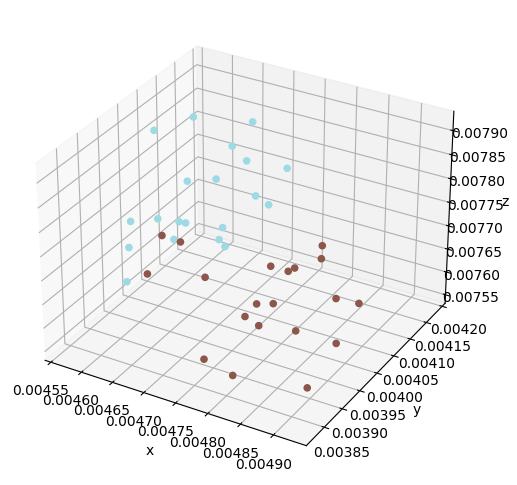

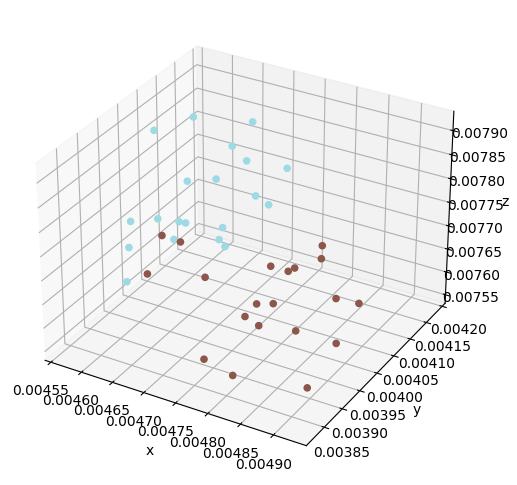

In [9]:
from snudda.plotting import PlotNetwork

pn2 = PlotNetwork(modified_network_file)
pn2.plot_populations(unmarked_alpha=0)
pn2.plot_populations(unmarked_alpha=0.02)

# The commented code below also plots the network, but with the option to plot more detail of the neurons:
# pn = PlotNetwork(network_path)
# pn.plot(plot_axon=False, plot_dendrite=False, plot_synapses=False, colour_population_unit=True)

pn2.close()  # Close the hdf5 file so others can use it (or better shut down kernel after)

In [10]:
sn.setup_input(network_file=modified_network_file, input_config="input.json", input_time=duration, parallel=True)

Setting up inputs, assuming input.json exists
Reading IPYPARALLEL connection info from /home/hjorth/HBP/Snudda/examples/notebooks/lateral_inhitibion/.ipython/profile_default/security/ipcontroller-client.json

Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
Writing input spikes to first_lateral/input-spikes.hdf5
Reading SNUDDA_DATA=../../../../BasalGangliaData/data from first_lateral/network-config.json
importing SnuddaInput from snudda.input.input on engine(s)


2024-02-12 18:37:48.709 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_2
2024-02-12 18:37:48.729 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_10
2024-02-12 18:37:48.709 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_6
2024-02-12 18:37:48.728 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_14
2024-02-12 18:37:48.731 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_22
2024-02-12 18:37:48.671 [IPController] client::client b'\x00k\x8bEm' requested 'connection_request'
2024-02-12 18:37:48.671 [IPController] client::client [b'\x00k\x8bEm'] connected
2024-02-12 18:37:48.714 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_1' to 0
2024-02-12 18:37:48.714 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_2' to 1
2024-02-12 18:37:48.71

Writing spikes to first_lateral/input-spikes.hdf5


2024-02-12 18:37:49.218 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_55' completed on 6
2024-02-12 18:37:49.241 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_51' completed on 2
2024-02-12 18:37:49.262 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_53' completed on 4
2024-02-12 18:37:49.268 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_52' completed on 3
2024-02-12 18:37:49.273 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_50' completed on 1
2024-02-12 18:37:49.335 [IPEngine] Handling execute_request: 319f313a-373b25415940c42e1ff16723_227842_58
2024-02-12 18:37:49.337 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_66
2024-02-12 18:37:49.336 [IPEngine] Handling execute_request: 319f313a-373b25415940c42e1ff16723_227842_62
2024-02-12 18:37:49.338 [IPEngine] Handling apply_request: 319f313a-373b25415940c42e1ff16723_227842_70
2024-02-1

stop_parallel disabled, to keep pool running.

Execution time: 316.0s


2024-02-12 18:37:49.686 [IPEngine] Handling execute_request: 319f313a-373b25415940c42e1ff16723_227842_76
2024-02-12 18:37:49.686 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_73' to 0
2024-02-12 18:37:49.688 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_74' to 1
2024-02-12 18:37:49.688 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_75' to 2
2024-02-12 18:37:49.689 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_76' to 3
2024-02-12 18:37:49.689 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_77' to 4
2024-02-12 18:37:49.689 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_78' to 5
2024-02-12 18:37:49.690 [IPController

2024-02-12 18:37:49.702 [IPController] queue::client b'\x00\xf4\xb0\xdcS' submitted request '319f313a-373b25415940c42e1ff16723_227842_80' to 7
2024-02-12 18:37:49.783 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_76' completed on 3
2024-02-12 18:37:49.787 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_77' completed on 4
2024-02-12 18:37:49.788 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_75' completed on 2
2024-02-12 18:37:49.788 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_78' completed on 5
2024-02-12 18:37:49.790 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_74' completed on 1
2024-02-12 18:37:49.790 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_80' completed on 7
2024-02-12 18:37:49.791 [IPController] queue::request '319f313a-373b25415940c42e1ff16723_227842_79' completed on 6
2024-02-12 18:37:49.792 [IPController] queue::reques

In [11]:
os.system('export IPYTHONDIR="`pwd`/.ipython" && ipcluster stop')

2024-02-12 18:37:50.075 [IPClusterStop] Stopping cluster 
2024-02-12 18:37:50.075 [IPClusterStop] Stopping controller
2024-02-12 18:37:50.075 [IPController] CRITICAL | Received signal 15, shutting down
2024-02-12 18:37:50.075 [IPController] CRITICAL | terminating children...
2024-02-12 18:37:50.248 [IPClusterStart] Controller stopped: {'exit_code': 0, 'pid': 227947, 'identifier': 'ipcontroller-227945'}
2024-02-12 18:37:50.250 [IPClusterStart] WARNING | Controller stopped. Shutting down.
2024-02-12 18:37:50.250 [IPClusterStart] ERROR | IPython cluster: stopping
2024-02-12 18:37:50.251 [IPClusterStart] Stopping engine(s): 1707759156
2024-02-12 18:37:50.284 [IPClusterStop] Stopping engine(s): 1707759156
2024-02-12 18:37:50.252 [IPEngine] CRITICAL | received signal 15, stopping
2024-02-12 18:37:50.306 [IPEngine] CRITICAL | received signal 15, stopping
2024-02-12 18:37:50.626 [KernelNanny.0] Pipe closed, parent 227987 has status: zombie
2024-02-12 18:37:50.626 [KernelNanny.0] Notifying Hub 

0

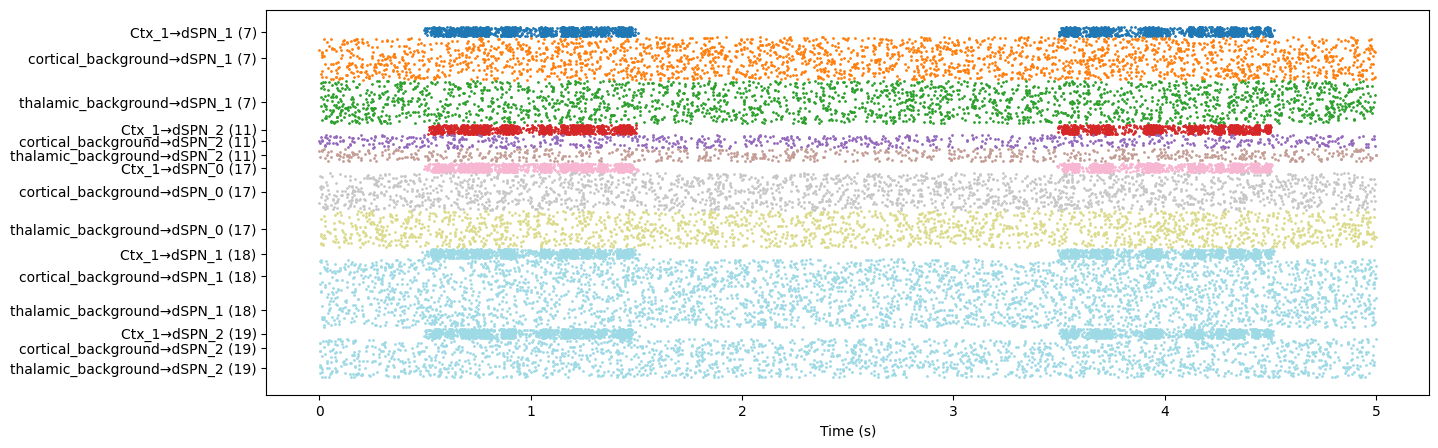

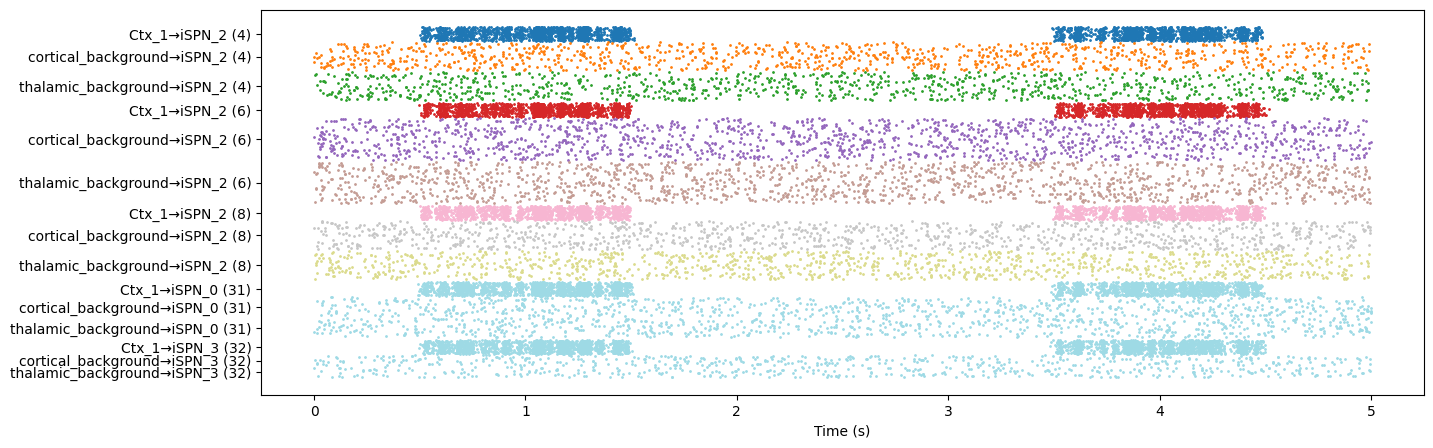

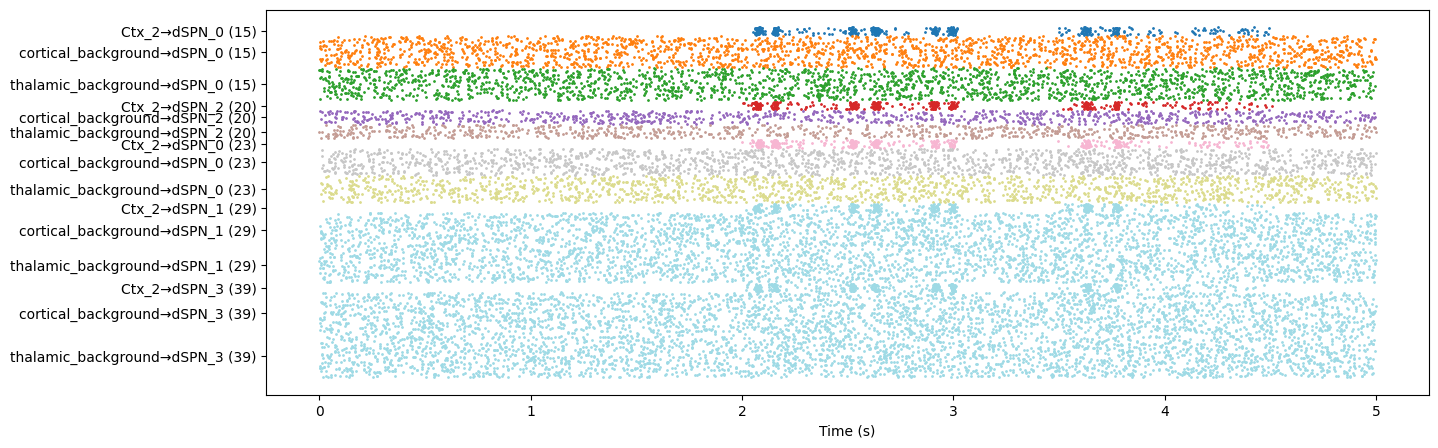

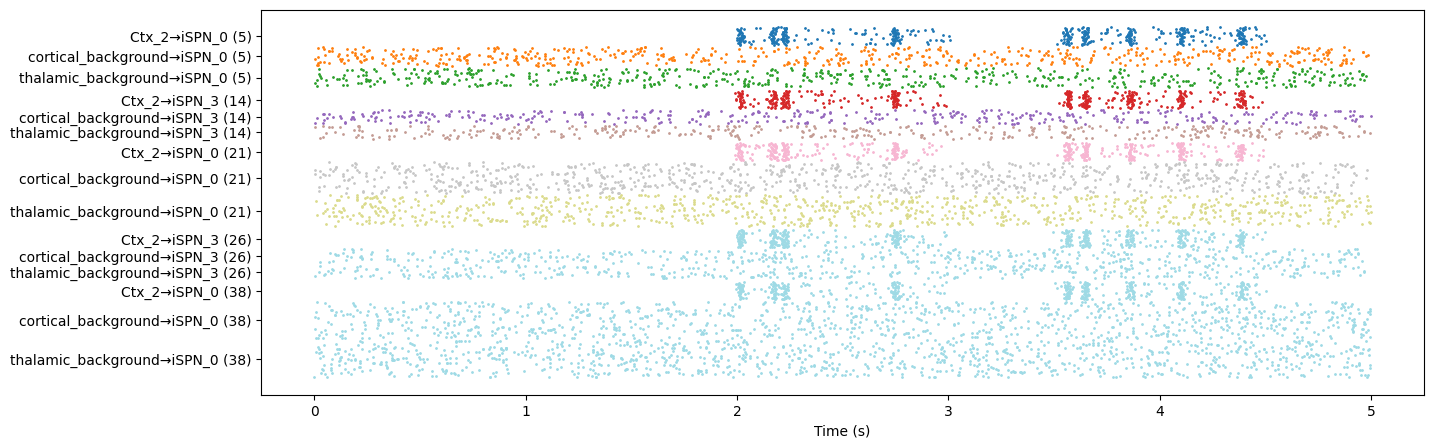

In [12]:
from snudda.plotting import PlotInput
input_file = os.path.join(network_path, "input-spikes.hdf5")
spi = PlotInput(input_file, modified_network_file)
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=1, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="dSPN", fig_size=(15,5))
spi.plot_input_population_unit(population_unit_id=2, num_neurons=5, neuron_type="iSPN", fig_size=(15,5))

In [13]:
n_cores=8
os.system(f"mpiexec -n {n_cores} snudda simulate {network_path} --networkFile {modified_network_file} --time {duration}")

args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
args.ipython_profile = None
numprocs=8
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCoreNeuron=False, record_all=None, ipython_profile=None)
args: Namespace(action='simulate', path='first_lateral', network_file='first_lateral/network-synapses-minimal.hdf5', input_file=None, output_file=None, time=5.0, snudda_data=None, simulation_config=None, record_volt=True, randomseed=None, neuromodulation=None, disable_synapses=None, disable_gj=None, mech_dir=None, profile=False, verbose=False, exportCore

0

Loading first_lateral/simulation/output.hdf5
WARNING. Depolarisation block in neuron - neuron_id: (name, parameter_key, morphology_key):
17: (dSPN_0, p7aa400d6, m22be6817)
Saving figure to first_lateral/figures/spike-raster.png


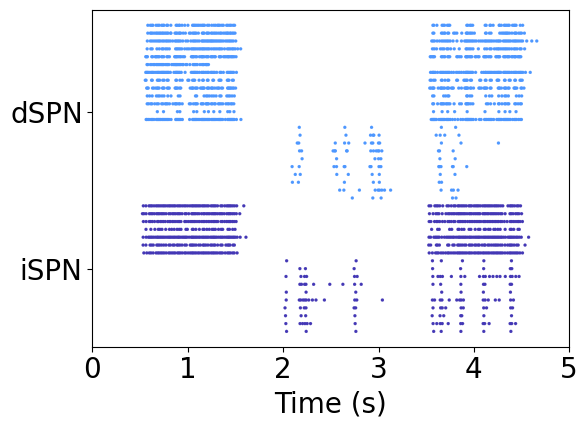

In [14]:
from snudda.plotting import SnuddaPlotSpikeRaster2
fig_file_raster = f"spike-raster.png"

time_range_zoom = (0,duration)
spr = SnuddaPlotSpikeRaster2(network_path=network_path,
                             network_file=modified_network_file)

spr.plot_spike_raster(fig_file=fig_file_raster, time_range=time_range_zoom)

Saving figure first_lateral/figures/spike-frequency-pop-units1-2.pdf


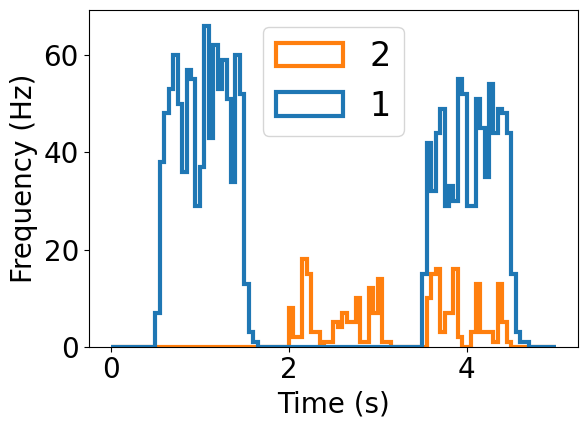

<Axes: xlabel='Time (s)', ylabel='Frequency (Hz)'>

In [15]:
spr.plot_spike_histogram()